In [1]:
import dill as pickle

In [2]:
import pickle as pkl

In [3]:
from nltk.translate.phrase_based import phrase_extraction,extract

from nltk.translate import AlignedSent

from nltk.translate import PhraseTable

import json
import os
import re
import string

from cltk.tokenize.word import WordTokenizer
from cltk.stem.lemma import LemmaReplacer
from nltk.translate import AlignedSent, Alignment, IBMModel1, IBMModel2
from nltk.tokenize import wordpunct_tokenize
from nltk.translate.ibm_model import AlignmentInfo

In [7]:
lat_tokenizer = WordTokenizer('latin')
eng_tokenizer = wordpunct_tokenize
lem = LemmaReplacer('latin')

In [232]:
with open('../pkls/eng_ibm_model_2_1.pk', 'rb') as fin:
    emod = pickle.load(fin)

In [10]:
with open('../pkls/lat_ibm_model_2_1.pk', 'rb') as fin:
    lmod = pickle.load(fin)

In [11]:
with open('../pkls/lat_ibm_model_2_bitext.pk', 'rb') as fin:
    lbitext = pkl.load(fin)

with open('../pkls/eng_ibm_model_2_bitext.pk', 'rb') as fin:
    ebitext = pkl.load(fin)

In [ ]:
lmod.best_model2_alignment(a)

In [ ]:
ai = _

In [ ]:
ali = zip(range(len(ai.alignment)),ai.alignment)

In [ ]:
l = [1,3,4]
l.append(0)

In [ ]:
ebitext[0].mots.append('none')
ebitext[0].words.append('none')

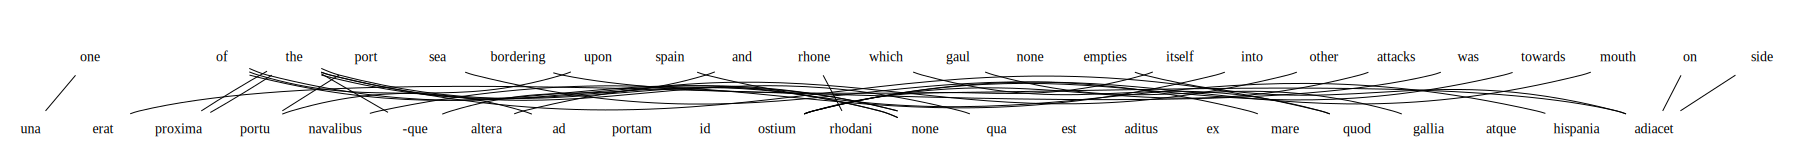

In [31]:
ebitext[1]

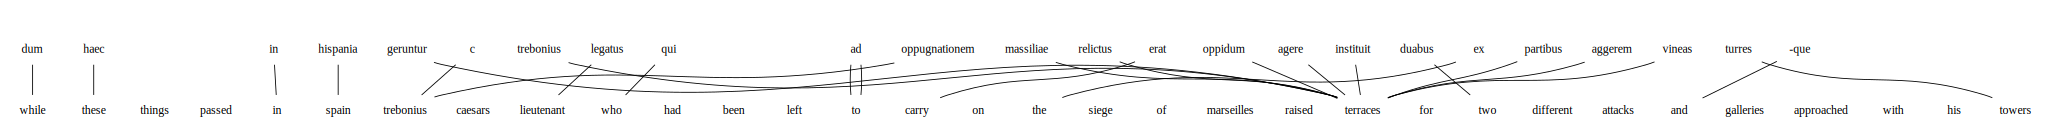

In [30]:
lbitext[0]

In [ ]:
lens = [len(ebitext[0].words),len(ebitext[0].mots)]

In [222]:
emod.best_model2_alignment(AlignedSent(ebitext[2].words,ebitext[2].mots))

In [226]:
print(ebitext[2].words,ebitext[2].mots)

['for', 'marseilles', 'is', 'washed', 'by', 'the', 'sea', 'on', 'three', 'sides', 'and', 'can', 'be', 'approached', 'by', 'land', 'only', 'on', 'the', 'fourth', 'of', 'which', 'that', 'part', 'where', 'the', 'citadel', 'stands', 'being', 'very', 'strong', 'by', 'nature', 'because', 'of', 'a', 'deep', 'valley', 'that', 'runs', 'before', 'it', 'requires', 'a', 'long', 'and', 'difficult', 'siege', 'none'] ['massilia', 'enim', 'fere', 'tribus', 'ex', 'oppidi', 'partibus', 'mari', 'alluitur', 'reliqua', 'quarta', 'est', 'quae', 'aditum', 'habeat', 'ab', 'terra', 'none']


In [234]:
a.alignment

(0,
 7,
 18,
 12,
 9,
 4,
 17,
 17,
 0,
 0,
 14,
 16,
 17,
 15,
 0,
 0,
 17,
 3,
 0,
 17,
 0,
 2,
 16,
 15,
 7,
 15,
 0,
 0,
 0,
 7,
 15,
 9,
 17,
 18,
 18,
 0,
 13,
 0,
 0,
 15,
 11,
 17,
 15,
 9,
 15,
 0,
 16,
 9,
 0,
 17)

In [233]:
for i in range(len(a.alignment)-1):
    print(ebitext[2].mots[i],ebitext[2].words[a.alignment[i]+1])

massilia marseilles
enim three
fere fourth
tribus approached
ex and
oppidi the
partibus the
mari the
alluitur marseilles
reliqua marseilles
quarta land
est on
quae the
aditum only
habeat marseilles
ab marseilles
terra the
none by


IndexError: list index out of range

In [170]:
EB = ebitext

In [ ]:
' '.join(ebitext[b].words)

In [ ]:
' '.join(ebitext[b].mots)

In [180]:
lbitext[0].alignment

Alignment([(0, 0), (1, 1), (2, 4), (3, 5), (4, 21), (5, 6), (6, 21), (7, 8), (8, 9), (9, 13), (10, 6), (11, 21), (12, 21), (13, 14), (14, 23), (15, 16), (16, 21), (17, 21), (18, 21), (19, 30), (20, 26), (21, 13), (22, 21), (23, 21), (24, 21)])

In [192]:
for a in ebitext[0].alignment:
    print(a)

(16, 16)
(6, 6)
(9, 8)
(12, 12)
(27, 17)
(18, None)
(19, 11)
(28, 19)
(26, 20)
(17, 11)
(10, 12)
(3, 6)
(30, 19)
(22, 10)
(1, 1)
(0, 0)
(13, 24)
(24, 6)
(14, 6)
(23, 14)
(32, 11)
(8, 7)
(4, 2)
(21, 18)
(11, 12)
(5, 3)
(15, 24)
(25, 17)
(20, 6)
(29, 24)
(7, 17)
(31, 20)
(2, 4)


In [194]:
lens

[34, 26]

In [195]:
a

(16, 16)

In [199]:
len(ebitext[b].mots)

26

In [204]:
ebitext[b].alignment

Alignment([(0, 0), (1, 1), (2, 4), (3, 6), (4, 2), (5, 3), (6, 6), (7, 17), (8, 7), (9, 8), (10, 12), (11, 12), (12, 12), (13, 24), (14, 6), (15, 24), (16, 16), (17, 11), (18, None), (19, 11), (20, 6), (21, 18), (22, 10), (23, 14), (24, 6), (25, 17), (26, 20), (27, 17), (28, 19), (29, 24), (30, 19), (31, 20), (32, 11)])

In [221]:
print(EB[2])

<AlignedSent: 'for marseilles is wa...' -> 'massilia enim fere t...'>


In [207]:
a

(16, 16)

In [205]:
list(ebitext[b].alignment)[:i].extend([tuple(tup)])

In [354]:
for b in range(len(ebitext)):
    if ebitext[b].mots[-1] != '***NULL***':
        ebitext[b].mots.append('***NULL***')
    if ebitext[b].words[-1] != '***NULL***':
        ebitext[b].words.append('***NULL***')
    lens = [len(ebitext[b].words),len(ebitext[b].mots)]

    alin = [list(tup) for tup in ebitext[b].alignment]

    for i,a in enumerate(alin):
        if None in a:
            alin[i][alin[i].index(None)] = lens[a.index(None)]-1

    alin = [tuple(tup) for tup in alin]

    ebitext[b].alignment = Alignment(alin)

In [12]:
from collections import defaultdict

In [210]:
b

2

In [357]:
len(ebitext)

13842

In [361]:
i

7829

In [436]:
list(phrases.keys())[16]

('between', 'two')

In [437]:
phrases[list(phrases.keys())[16]]

[1, defaultdict(int, {('inter', 'duos'): 1})]

In [439]:
b

7829

In [454]:
pe

[((4, 5), (26, 27), 'gave', 'quod dierum essent pactae'),
 ((3, 4),
  (9, 10),
  'that',
  'ut ille qui cum triginta dierum essent cum hoste indutiae factae'),
 ((4, 5), (26, 27), 'gave', 'quod dierum essent pactae non'),
 ((4, 5), (26, 27), 'gave', 'agros quod dierum essent pactae non'),
 ((4, 5), (26, 27), 'gave', 'agros quod dierum essent pactae non noctium'),
 ((3, 4), (9, 10), 'that', 'ut ille qui cum triginta dierum'),
 ((3, 4), (9, 10), 'that', 'ut ille'),
 ((4, 5), (26, 27), 'gave', 'pactae non'),
 ((3, 4), (9, 10), 'that', 'ut ille qui cum'),
 ((4, 5), (26, 27), 'gave', 'quod dierum essent pactae non noctium'),
 ((4, 5), (26, 27), 'gave', 'dierum essent pactae'),
 ((3, 4), (9, 10), 'that', 'ut ille qui cum triginta dierum essent'),
 ((3, 4),
  (9, 10),
  'that',
  'ut ille qui cum triginta dierum essent cum hoste indutiae'),
 ((4, 5), (26, 27), 'gave', 'essent pactae'),
 ((4, 5), (26, 27), 'gave', 'pactae non noctium'),
 ((3, 4), (9, 10), 'that', 'ut ille qui cum triginta'),
 

In [458]:
phrases[('that',)][1][('ut',)]

281

In [464]:
pe

[((4, 5), (26, 27), 'gave', 'quod dierum essent pactae'),
 ((3, 4),
  (9, 10),
  'that',
  'ut ille qui cum triginta dierum essent cum hoste indutiae factae'),
 ((4, 5), (26, 27), 'gave', 'quod dierum essent pactae non'),
 ((4, 5), (26, 27), 'gave', 'agros quod dierum essent pactae non'),
 ((4, 5), (26, 27), 'gave', 'agros quod dierum essent pactae non noctium'),
 ((3, 4), (9, 10), 'that', 'ut ille qui cum triginta dierum'),
 ((3, 4), (9, 10), 'that', 'ut ille'),
 ((4, 5), (26, 27), 'gave', 'pactae non'),
 ((3, 4), (9, 10), 'that', 'ut ille qui cum'),
 ((4, 5), (26, 27), 'gave', 'quod dierum essent pactae non noctium'),
 ((4, 5), (26, 27), 'gave', 'dierum essent pactae'),
 ((3, 4), (9, 10), 'that', 'ut ille qui cum triginta dierum essent'),
 ((3, 4),
  (9, 10),
  'that',
  'ut ille qui cum triginta dierum essent cum hoste indutiae'),
 ((4, 5), (26, 27), 'gave', 'essent pactae'),
 ((4, 5), (26, 27), 'gave', 'pactae non noctium'),
 ((3, 4), (9, 10), 'that', 'ut ille qui cum triginta'),
 

In [469]:
lat_tokenizer.tokenize('***NULL***')

['*', '*', '*', 'NULL', '*', '*', '*']

In [471]:
phrases[('the',)][1][('NULL',)]

0

In [487]:
b

11352

In [490]:
skip = [7829, 9778,11352]

phrases = defaultdict(lambda: [0,defaultdict(int)])
error = []

i = 0
base = .5
for b in range(len(ebitext)): 
    if b in skip:
        continue
    pe = phrase_extraction(' '.join(ebitext[b].words), ' '.join(ebitext[b].mots), ebitext[b].alignment,max_phrase_length=4)
    
    if i == 1000*base:
        print(i)
        base += .5
    
    if i > 7500:
        print(i)
        print(len(pe))
    i += 1
    
    pe = list(pe)
    for phrase in pe:
        if phrase[2] != '***NULL***':
            english_tokens = eng_tokenizer(phrase[2])
        else:
            english_tokens = ['***NULL***']
        if phrase[3] != '***NULL***':    
            lat_tokens = lat_tokenizer.tokenize(phrase[3])
        else:
            lat_tokens = ['***NULL***']
        if len(english_tokens) < 5 and len(lat_tokens) < 5:
            phrases[tuple(english_tokens)][1][tuple(lat_tokens)] += 1
            phrases[tuple(english_tokens)][0] += 1

In [360]:
print('done')

done


In [77]:
i = 105

In [81]:
p = list(phrases.keys())[1]

In [128]:
import dill as pkl

In [129]:
with open('../pkls/latin_lang_model.pk', 'rb') as fin:
    lang_model = pkl.load(fin)

In [103]:
import operator

In [189]:
men = ['hominem','homo','uir','homini']
kings = ['rex','regem','regi']
mprob = [('hominem',11/121),('homo',8/121),('vir',7/121),('homini',7/121)] # man
kprob = [('rex', 21/57),('regem', 9/57),('regi', 3/57)]

In [190]:
for i,man in enumerate(men):
    for j,king in enumerate(kings):
        p_s = lang_model.S(man,('**','**')) * lang_model.S('occidit',('**',man)) * lang_model.S(king,(man,'occidit'))
        p_s *= mprob[i][1]*kprob[j][1]
        print('{} occidit {}: p = {}'.format(man,king,p_s))

hominem occidit rex: p = 3.60465714482275e-15
hominem occidit regem: p = 8.273542153451247e-16
hominem occidit regi: p = 1.3762171106960814e-16
homo occidit rex: p = 6.525631770352761e-15
homo occidit regem: p = 1.4977870948824759e-15
homo occidit regi: p = 2.4914120094223373e-16
uir occidit rex: p = 5.404628191305531e-15
uir occidit regem: p = 1.2404902149631775e-15
uir occidit regi: p = 2.063425589451123e-16
homini occidit rex: p = 8.251340750084777e-16
homini occidit regem: p = 1.8938781907834768e-16
homini occidit regi: p = 3.150268075497897e-17


In [179]:
p_s_1 = lang_model.S(man,('**','**')) * lang_model.S('occidit',('**',man)) * lang_model.S(king,(man,'occidit'))

In [ ]:
[('',2148),('in',176),('est',158),('et',133)] # the 
[('hominem',11)('homo',8),('vir',7),('homini',7)] # man
[('occidit',2), ] # kills
[('rex', 21),('regem', 9),('regi', 3)]

In [550]:
translation = emod.translation_table['fountain']

sorted_t = sorted(translation.items(), key=operator.itemgetter(1),reverse=True)

sorted_t

[('fontis', 0.2936441819920631),
 ('constitutus', 0.11262149793015885),
 ('fons', 0.0985727910859336),
 ('depromitur', 0.08402981090602303),
 ('restagnat', 0.013143607459389056),
 ('area', 0.0004690271298414001),
 ('liberalis', 1.5494001402717628e-05),
 ('largitio', 8.339790225128935e-06),
 ('fontem', 8.225326068030945e-06),
 ('consumebatur', 6.786524710968317e-06),
 ('benevolentiam', 4.774000874760639e-06),
 ('gratificandi', 1.3362340716389894e-06),
 ('constet', 9.044382522071335e-07),
 ('fanni', 5.57347055126997e-07),
 ('exhaurit', 5.828952413830373e-08),
 ('cuniculos', 6.001423083779439e-10),
 ('benignitatis', 3.367112137712248e-10),
 ('derecto', 1.7110957383613525e-10),
 ('aquari', 1.4995954350282797e-10),
 ('licebat', 5.720607194166476e-11),
 ('scaevola', 2.9961537373962094e-11),
 ('iacerentur', 1.3764369629471675e-12),
 ('agunt', 1.0900161861214662e-12),
 ('iumenta', 1e-12),
 ('-que', 1e-12),
 ('ullo', 1e-12),
 ('abest', 1e-12),
 ('a', 1e-12),
 ('hostium', 1e-12),
 ('tantum', 1e-

In [554]:
lang_model.word_proba('puellas',('inter'),n=1)


0.0

In [461]:
p = ('that',)
phrase = phrases[p][1][('ut',)]

In [598]:
lk = [k for k in list(phrases.keys()) if len(k) < 3]

In [599]:
for i in range(len(lk)):
    print(i, lk[i])

0 ('wax', 'soda')
1 ('obeyed',)
2 ('is', 'stronger')
3 ('open', 'air')
4 ('embarked',)
5 ('bowels',)
6 ('no', 'way')
7 ('ganges',)
8 ('noxious', 'when')
9 ('for', 'broken')
10 ('unless', 'weak')
11 ('occur',)
12 ('that', 'with')
13 ('party',)
14 ('fountain',)
15 ('forty',)
16 ('combined',)
17 ('the', 'name')
18 ('thousand', 'times')
19 ('writes',)
20 ('defiles',)
21 ('slaves', 'who')
22 ('isocrates',)
23 ('first', 'water')
24 ('error',)
25 ('day', 'he')
26 ('transferred', 'to')
27 ('fortify',)
28 ('cloaks',)
29 ('produce',)
30 ('disease', 'are')
31 ('this', 'ulceration')
32 ('at', 'and')
33 ('other', 'medicaments')
34 ('of', 'glory')
35 ('most', 'welcome')
36 ('sight',)
37 ('books', 'on')
38 ('levies', 'frighted')
39 ('rather', 'gladden')
40 ('one', 'or')
41 ('upon', 'as')
42 ('obscure', 'difficulties')
43 ('either', 'subsides')
44 ('pubes',)
45 ('feel',)
46 ('sinews', 'womb')
47 ('crags',)
48 ('africa',)
49 ('great', 'danger')
50 ('day', 'the')
51 ('uncle', 'valens')
52 ('vinegar', 's

In [655]:
p = lk[1346]
phrase = phrases[p][1]

sorted_p = sorted(phrase.items(), key=operator.itemgetter(1),reverse=True)

sorted_p

[(('suos', '-', 'que'), 1),
 (('suos',), 1),
 (('recesserunt', 'suos'), 1),
 (('recesserunt', 'suos', '-', 'que'), 1)]

###### mk = [k for k in list(phrases.keys()) if len(k) > 2]

In [565]:
for i in range(len(mk)):
    print(i, mk[i])

0 ('it', 'is', 'even')
1 ('of', 'rose', 'oil')
2 ('being', 'asked', 'many')
3 ('with', 'our', 'horse')
4 ('sunrise', 'till', 'evening')
5 ('be', 'notgood', 'faith', 'in')
6 ('this', 'sort', 'of')
7 ('roasted', 'salt', 'with', 'honey')
8 ('annals', '***', 'NULL', '***')
9 ('moderately', 'with', 'a')
10 ('there', 'is', 'then')
11 ('and', 'of', 'their')
12 ('discharge', 'of', 'rheum')
13 ('and', 'one', 'of', 'its')
14 ('was', 'consul', 'three', 'times')
15 ('too', 'much', 'either')
16 ('in', 'that', 'state', 'two')
17 ('great', 'and', 'rich', 'cities')
18 ('the', 'first', 'days')
19 ('disease', 'swellings', 'arise')
20 ('the', 'fourth', 'and', 'then')
21 ('emperors', 'court', 'and')
22 ('days', 'before', 'domitius')
23 ('people', 'overturn', 'the', 'fundamental')
24 ('practice', '***', 'NULL', '***')
25 ('verdigris', '***', 'NULL', '***')
26 ('never', 'doubted', 'that')
27 ('boastfully', '***', 'NULL', '***')
28 ('mustard', 'and', 'pepper')
29 ('greeks', 'call', 'this', 'hydrops')
30 ('fo

In [609]:
p = mk[5620]
phrase = phrases[p][1]

sorted_p = sorted(phrase.items(), key=operator.itemgetter(1),reverse=True)

sorted_p

[(('aliis', '-', 'que', 'urbibus'), 1)]

In [595]:
phrases[('favorable', 'weather')]

[2, defaultdict(int, {('idoneam', 'tempestatem'): 1, ('tempestatem',): 1})]

In [165]:
phrases[('sea')]

[0, defaultdict(int, {})]

In [40]:
phl = pl.pop()
phe = pe.pop()

In [ ]:
extract()

In [ ]:
p.pop()

In [ ]:
ali

In [ ]:
list(ali)[1:]


In [ ]:
emod.best_model2_alignment

In [ ]:
ai.src_sentence

In [225]:
error[:10]

[2, 6, 7, 8, 10, 14, 16, 18, 20, 24]

In [235]:
ebitext[2].alignment

Alignment([(0, 1), (1, 8), (2, 11), (3, 8), (4, 15), (5, None), (6, 7), (7, 13), (8, 3), (9, 13), (10, None), (11, 8), (12, 11), (13, 8), (14, 15), (15, 16), (16, 13), (17, 13), (18, None), (19, 10), (20, 4), (21, 12), (22, 14), (23, 6), (24, 5), (25, None), (26, 8), (27, 8), (28, 13), (29, 8), (30, 8), (31, 15), (32, 14), (33, 8), (34, 4), (35, 4), (36, 8), (37, 8), (38, 14), (39, 8), (40, 8), (41, 11), (42, 8), (43, 4), (44, 8), (45, None), (46, 8), (47, 8)])